In [1]:
#import pandas for reading and handling of data

import pandas as pd

filename = 'medical_clean.csv'
mrd = pd.read_csv(filename)
mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [2]:
#drop columns that are not relevant to the task


mrd_clean = mrd.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
                      'TimeZone', 'Job', 'Income', 'Marital', 'Services', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7',
                      'Item8'], axis = 1)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   ReAdmis             10000 non-null  object 
 4   VitD_levels         10000 non-null  float64
 5   Doc_visits          10000 non-null  int64  
 6   Full_meals_eaten    10000 non-null  int64  
 7   vitD_supp           10000 non-null  int64  
 8   Soft_drink          10000 non-null  object 
 9   Initial_admin       10000 non-null  object 
 10  HighBlood           10000 non-null  object 
 11  Stroke              10000 non-null  object 
 12  Complication_risk   10000 non-null  object 
 13  Overweight          10000 non-null  object 
 14  Arthritis           10000 non-null  object 
 15  Diabetes            10000 non-null  object 
 16  Hyper

In [3]:
#check the data for missing values

mrd_clean.isnull().sum()

Children              0
Age                   0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Initial_days          0
dtype: int64

In [4]:
#import stats to check for outliers
#import seaborn to visualize these outliers
#start with variable Children and repeat the process for the continuous variables

from scipy import stats
import seaborn as sb

mrd_clean['zscore_children'] = stats.zscore(mrd_clean['Children'])
sum(mrd_clean.zscore_children > 3)

202

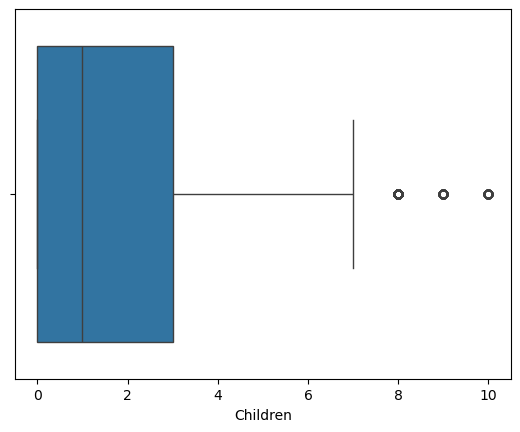

In [5]:
out = sb.boxplot(x = 'Children', data = mrd_clean)

In [6]:
mrd_clean['zscore_age'] = stats.zscore(mrd_clean['Age'])
sum((mrd_clean.zscore_age < -3) | (mrd_clean.zscore_age > 3))

0

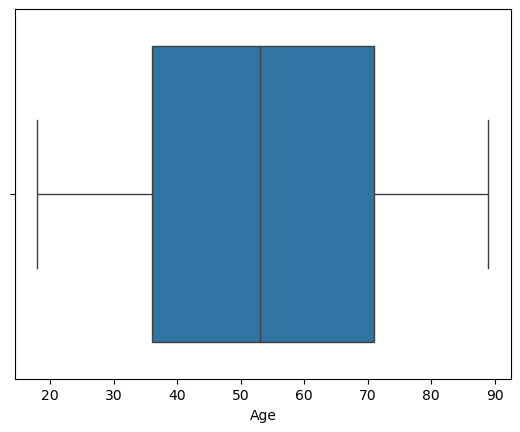

In [7]:
out = sb.boxplot(x = 'Age', data = mrd_clean)

In [8]:
mrd_clean['zscore_vitd_levels'] = stats.zscore(mrd_clean['VitD_levels'])
sum((mrd_clean.zscore_vitd_levels < -3) | (mrd_clean.zscore_vitd_levels > 3))

24

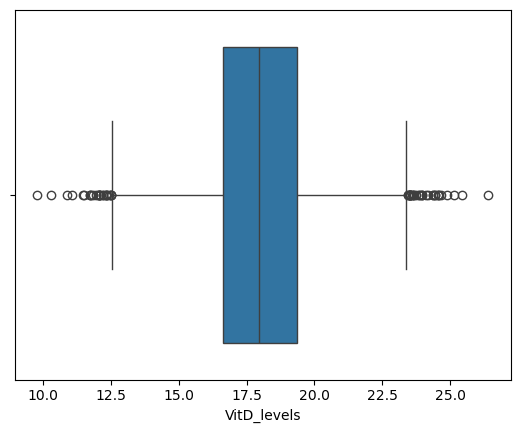

In [9]:
out = sb.boxplot(x = 'VitD_levels', data = mrd_clean)

In [10]:
mrd_clean['zscore_doc_visits'] = stats.zscore(mrd_clean['Doc_visits'])
sum((mrd_clean.zscore_doc_visits < -3) | (mrd_clean.zscore_doc_visits > 3))

8

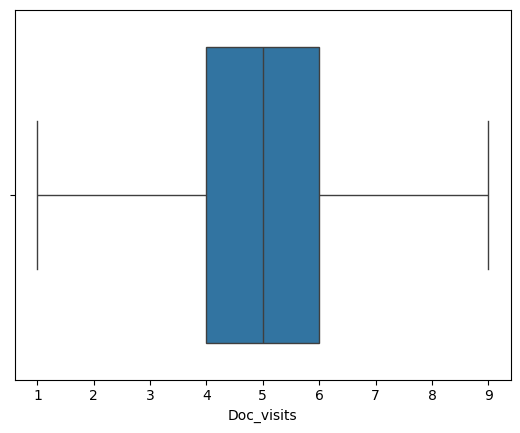

In [11]:
out = sb.boxplot(x = 'Doc_visits', data = mrd_clean)

In [12]:
mrd_clean['zscore_fullmeals'] = stats.zscore(mrd_clean['Full_meals_eaten'])
sum((mrd_clean.zscore_fullmeals < -3) | (mrd_clean.zscore_fullmeals > 3))

33

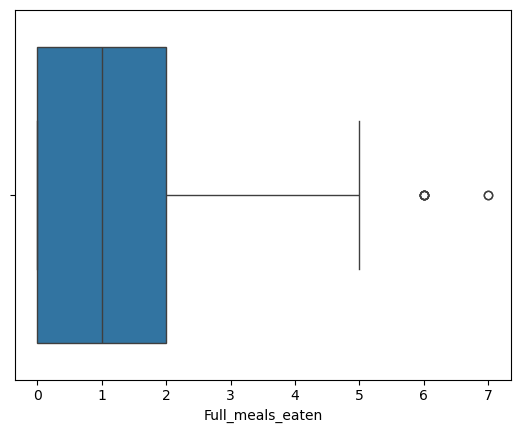

In [13]:
out = sb.boxplot(x = 'Full_meals_eaten', data = mrd_clean)

In [14]:
mrd_clean['zscore_vitdsupp'] = stats.zscore(mrd_clean['vitD_supp'])
sum((mrd_clean.zscore_vitdsupp < -3) | (mrd_clean.zscore_vitdsupp > 3))

70

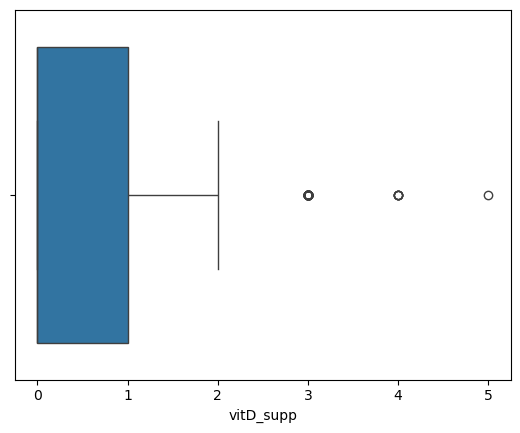

In [15]:
out = sb.boxplot(x = 'vitD_supp', data = mrd_clean)

In [16]:
mrd_clean['zscore_initial'] = stats.zscore(mrd_clean['Initial_days'])
sum((mrd_clean.zscore_initial < -3) | (mrd_clean.zscore_initial > 3))

0

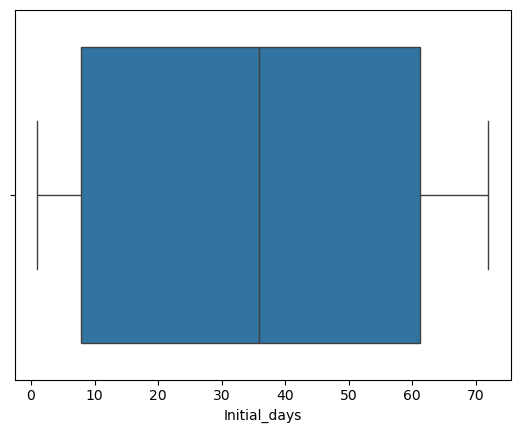

In [17]:
out = sb.boxplot(x = 'Initial_days', data = mrd_clean)

In [18]:
#since outliers are expected, they are retained
#drop the created columns
#make sure only the columns we are interested in are present

mrd_clean = mrd_clean.drop(['zscore_children', 'zscore_age', 'zscore_vitd_levels', 'zscore_doc_visits', 'zscore_fullmeals',
                            'zscore_vitdsupp', 'zscore_initial'], axis = 1)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   ReAdmis             10000 non-null  object 
 4   VitD_levels         10000 non-null  float64
 5   Doc_visits          10000 non-null  int64  
 6   Full_meals_eaten    10000 non-null  int64  
 7   vitD_supp           10000 non-null  int64  
 8   Soft_drink          10000 non-null  object 
 9   Initial_admin       10000 non-null  object 
 10  HighBlood           10000 non-null  object 
 11  Stroke              10000 non-null  object 
 12  Complication_risk   10000 non-null  object 
 13  Overweight          10000 non-null  object 
 14  Arthritis           10000 non-null  object 
 15  Diabetes            10000 non-null  object 
 16  Hyper

In [19]:
#identify the columns that need to become binary
#map yes values to 1 and no values to 0 for KNN model purposes

yesno_cols = ['Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
              'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'ReAdmis']
bin_encoding = {"Yes":1, "No":0}
for col in yesno_cols:
    mrd_clean[col] = mrd_clean[col].replace(bin_encoding)

/var/folders/_y/fjx1srl932v_lwvdp98jq5dr0000gn/T/ipykernel_10243/1877030173.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mrd_clean[col] = mrd_clean[col].replace(bin_encoding)


In [20]:
#check to make sure values were correctly replaced using one of the categorical variables

print(mrd_clean['Soft_drink'])

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: Soft_drink, Length: 10000, dtype: int64


In [21]:
#need to map the variable complication_risk since it also has non-numerical values
#mapped low to 1, medium to 2, and high to 3
#change the variable type to integer as new values will all be numerical
#check to make sure the values were correctly replaced

comp_risk_map = {'High':3, 'Medium':2, 'Low':1}
mrd_clean['Complication_risk'] = mrd_clean['Complication_risk'].map(comp_risk_map)
mrd_clean['Complication_risk'] = mrd_clean['Complication_risk'].astype(int)
print(mrd_clean['Complication_risk'])

0       2
1       3
2       2
3       2
4       1
       ..
9995    2
9996    2
9997    3
9998    2
9999    1
Name: Complication_risk, Length: 10000, dtype: int64


In [22]:
#print columns to make sure we have all of the variable we want for our model

print(mrd_clean.columns)

Index(['Children', 'Age', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Initial_days'],
      dtype='object')


In [23]:
#check column types to identify which columns we need to one hot encode still

print(mrd_clean.dtypes)

Children                int64
Age                     int64
Gender                 object
ReAdmis                 int64
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink              int64
Initial_admin          object
HighBlood               int64
Stroke                  int64
Complication_risk       int64
Overweight              int64
Arthritis               int64
Diabetes                int64
Hyperlipidemia          int64
BackPain                int64
Anxiety                 int64
Allergic_rhinitis       int64
Reflux_esophagitis      int64
Asthma                  int64
Initial_days          float64
dtype: object


In [24]:
#two columns need to be one hot encoded
#get_dummies used to complete this process
#creates new columns for each value and uses 1 to indicate the value is present or 0 to indicate it is not
#change the type of these columns to integer now that they are all numerical in nature

cat_cols = ['Gender', 'Initial_admin']
mrd_clean = pd.get_dummies(mrd_clean, columns = cat_cols, drop_first = False)
mrd_clean = mrd_clean.astype(int)

In [25]:
#as stated above, new columns were created during one hot encoding
#now we have each gender and each type of admission by themselves

print(mrd_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Children                             10000 non-null  int64
 1   Age                                  10000 non-null  int64
 2   ReAdmis                              10000 non-null  int64
 3   VitD_levels                          10000 non-null  int64
 4   Doc_visits                           10000 non-null  int64
 5   Full_meals_eaten                     10000 non-null  int64
 6   vitD_supp                            10000 non-null  int64
 7   Soft_drink                           10000 non-null  int64
 8   HighBlood                            10000 non-null  int64
 9   Stroke                               10000 non-null  int64
 10  Complication_risk                    10000 non-null  int64
 11  Overweight                           10000 non-null  in

In [26]:
#now that we have all of our variables for the model correctly identified and properly encoded, we need to scale continuous variables
#import standardscaler for this process

from sklearn.preprocessing import StandardScaler

cont_cols = ['Children', 'Age', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days']
scaler = StandardScaler()
mrd_clean[cont_cols] = scaler.fit_transform(mrd_clean[cont_cols])

In [27]:
#verify we still have all our variables after scaling data

print(mrd_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Children                             10000 non-null  float64
 1   Age                                  10000 non-null  float64
 2   ReAdmis                              10000 non-null  int64  
 3   VitD_levels                          10000 non-null  float64
 4   Doc_visits                           10000 non-null  float64
 5   Full_meals_eaten                     10000 non-null  float64
 6   vitD_supp                            10000 non-null  float64
 7   Soft_drink                           10000 non-null  int64  
 8   HighBlood                            10000 non-null  int64  
 9   Stroke                               10000 non-null  int64  
 10  Complication_risk                    10000 non-null  int64  
 11  Overweight                   

In [28]:
#now renaming columns for ease of use for the model

pythonic_cols = ['children', 'age', 'readmis', 'vitd_levels', 'doc_visits', 'full_meals', 'vitd_supp', 'soft_drink',
                 'highbp', 'stroke', 'comp_risk', 'overweight', 'arthritis', 'diabetes', 'hyperlipidemia', 'backpain',
                 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma', 'initial_days', 'gender_f',
                 'gender_m', 'gender_n', 'initial_admin_ela', 'initial_admin_ema', 'initial_admin_oa']
mrd_clean = mrd_clean.set_axis(pythonic_cols, axis = 1)

In [29]:
#once agian make sure all variables are as they should be to start the KNN process
#use head function to get first few values to verify each variable is ready

print(mrd_clean.head())

   children       age  readmis  vitd_levels  doc_visits  full_meals  \
0 -0.507129 -0.024795        0     0.754215    0.944647   -0.993387   
1  0.417277 -0.121706        0     0.264083   -0.967981    0.990609   
2  0.417277 -0.024795        0     0.264083   -0.967981   -0.001389   
3 -0.969332  1.186592        0    -0.716180   -0.967981   -0.001389   
4 -0.507129 -1.526914        0    -0.226049   -0.011667   -0.993387   

   vitd_supp  soft_drink  highbp  stroke  ...  allergic_rhinitis  \
0  -0.634713           0       1       0  ...                  1   
1   0.956445           0       1       0  ...                  0   
2  -0.634713           0       1       0  ...                  0   
3  -0.634713           0       0       1  ...                  0   
4   2.547602           1       0       0  ...                  1   

   reflux_esophagitis  asthma  initial_days  gender_f  gender_m  gender_n  \
0                   0       1     -0.910864         0         1         0   
1         

In [30]:
#define our X and y
#our depdendent variable is readmis, so X is all of the predictor variables besides readmis
#our y is the dependent variable readmis

df_X = mrd_clean.drop(['readmis'], axis = 1).copy()
df_y = mrd_clean['readmis'].copy()

In [31]:
#import selectkbest and f_classif to find our most important predictors
#using 0.05 threshold, we can find which features have statistical significance for our model
#these predictors will be retained for our model

from sklearn.feature_selection import SelectKBest, f_classif

feat_select = SelectKBest(f_classif, k = 'all')
feat_select.fit_transform(df_X, df_y)
feat_pvals = pd.DataFrame({'feature':df_X.columns, 'p_value':feat_select.pvalues_}).sort_values('p_value')
feat_pvals[feat_pvals['p_value']<0.05]

,feature,p_value
19,initial_days,0.000000
0,children,0.018613
24,initial_admin_ema,0.048766


In [32]:
#check significant variables for multicollinearity
#import VIF to check

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = mrd_clean[['initial_days', 'children', 'initial_admin_ema']]
vif_mrd = pd.DataFrame()
vif_mrd["feature"] = X.columns
vif_mrd["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

In [33]:
#print the results
#all VIF values are < 5, so they are retained and used for the model

print(vif_mrd)

             feature       VIF
0       initial_days  1.000573
1           children  1.000551
2  initial_admin_ema  1.000108


In [34]:
#export our cleaned and ready to use data to a csv file

mrd_clean.to_csv('med_task1.csv', index = False)

In [35]:
#now we can create our model
#import train_test_split
#X is the same set we defined earlier, the predictor variables
#y is the same, our dependent variable
#split the data using 70/30 split
#use random state = 42 for reproducibility

from sklearn.model_selection import train_test_split

X = df_X
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [36]:
#output the training and testing sets to their own csv files for submission

pd.DataFrame(X_train, y_train).to_csv('train_set.csv', index = False)
pd.DataFrame(X_test, y_test).to_csv('test_set.csv', index = False)

In [37]:
#import numpy
#import KNeighborsClassifier
#import GridSearchCV for k selection purposes
#run GridSearchCV to find our optimal k value
#print the best parameter

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 30}

In [38]:
#our optimal k is 30
#find the best accuracy score of this k

knn_cv.best_score_

0.9157142857142857

In [39]:
#run KNN model using our identified parameter

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [40]:
#import confusion_matrix to evaluate the KNN model performance

from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)

In [41]:
#give labels to find the accuracy of both the training and testing set
#print the accuracies and confusion matrix

print('Accuracy of KNN classifier on train set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
print(final_matrix)

Accuracy of KNN classifier on train set: 0.92
Accuracy of KNN classifier on test set: 0.91
[[1635  264]
 [   3 1098]]


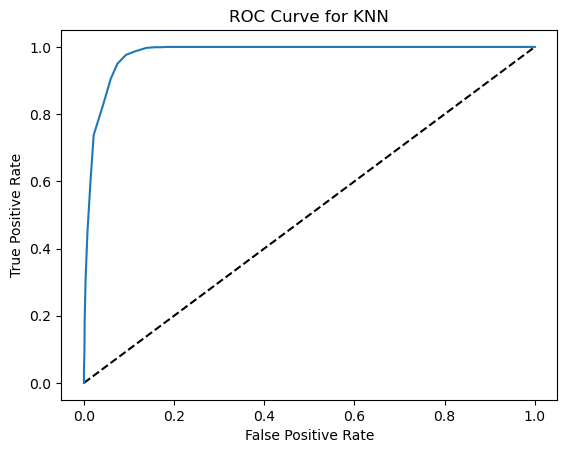

In [42]:
#to evaluate performance another way, import roc_curve
#import matplotlib to create roc visualization
#label the graph and axes
#show the curve vs the line y=x

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.show()

In [43]:
#import package to calculate auc score
#get classification report for our model

from sklearn.metrics import roc_auc_score, classification_report

print(f"Area Under the Curve (AUC) Score: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

Area Under the Curve (AUC) Score: 0.9796876696420842

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1899
           1       0.81      1.00      0.89      1101

    accuracy                           0.91      3000
   macro avg       0.90      0.93      0.91      3000
weighted avg       0.93      0.91      0.91      3000

